# Some basics through examples
Think if pandas as a table of data.\
Like on a document; A table as data (numbers, text, *etc*), and each column has a name. 

In [1]:
import pathlib
import pandas as pd

In [6]:
path = pathlib.Path("data").resolve()
files = [*path.iterdir()]
files

[WindowsPath('C:/Users/KristianThorbjørnsen/OneDrive - Corvus Energy/Documents/GitHub/pythoncourse/data/data_0'),
 WindowsPath('C:/Users/KristianThorbjørnsen/OneDrive - Corvus Energy/Documents/GitHub/pythoncourse/data/data_1'),
 WindowsPath('C:/Users/KristianThorbjørnsen/OneDrive - Corvus Energy/Documents/GitHub/pythoncourse/data/data_10'),
 WindowsPath('C:/Users/KristianThorbjørnsen/OneDrive - Corvus Energy/Documents/GitHub/pythoncourse/data/data_11'),
 WindowsPath('C:/Users/KristianThorbjørnsen/OneDrive - Corvus Energy/Documents/GitHub/pythoncourse/data/data_12'),
 WindowsPath('C:/Users/KristianThorbjørnsen/OneDrive - Corvus Energy/Documents/GitHub/pythoncourse/data/data_13'),
 WindowsPath('C:/Users/KristianThorbjørnsen/OneDrive - Corvus Energy/Documents/GitHub/pythoncourse/data/data_14'),
 WindowsPath('C:/Users/KristianThorbjørnsen/OneDrive - Corvus Energy/Documents/GitHub/pythoncourse/data/data_15'),
 WindowsPath('C:/Users/KristianThorbjørnsen/OneDrive - Corvus Energy/Documents/Git

In [18]:
file = files[0]
df = pd.read_csv(files[0])
df

,a,b,c,d,e,f,g,h,i,j
0,86,18,44,46,28,40,34,14,7,34
1,46,48,28,11,31,51,63,39,1,6
2,84,36,30,6,66,57,28,83,94,75
3,79,63,36,29,88,37,39,58,46,12
4,54,12,67,15,12,46,62,62,20,22
...,...,...,...,...,...,...,...,...,...,...
9995,74,67,71,86,14,59,70,26,40,87
9996,52,56,9,88,51,54,13,60,89,68
9997,16,9,84,62,85,2,64,41,21,92
9998,68,54,61,35,32,36,15,96,79,86


In [24]:
df.query("a==3 and c<5")

,a,b,c,d,e,f,g,h,i,j
2744,3,47,2,98,45,70,27,3,8,42
5416,3,73,2,23,7,79,52,49,23,71
5921,3,18,0,42,75,98,36,3,90,90
8023,3,96,2,8,53,46,31,58,91,16
9272,3,39,1,0,40,35,5,53,36,69


In [ ]:
df.loc[(df["a"] < 3) & (df["c"] < 3), :]

,a,b,c,d,e,f,g,h,i,j
2211,2,45,1,1,33,86,81,16,25,87
2650,1,57,0,56,17,61,30,92,82,66
4690,1,49,0,82,19,48,47,87,58,57
8006,0,37,2,49,76,85,28,71,87,0
9007,0,45,1,57,36,27,33,96,29,98
9456,1,58,2,75,10,71,69,51,66,52
9944,0,27,1,44,37,35,12,11,76,3


<Axes: xlabel='a'>

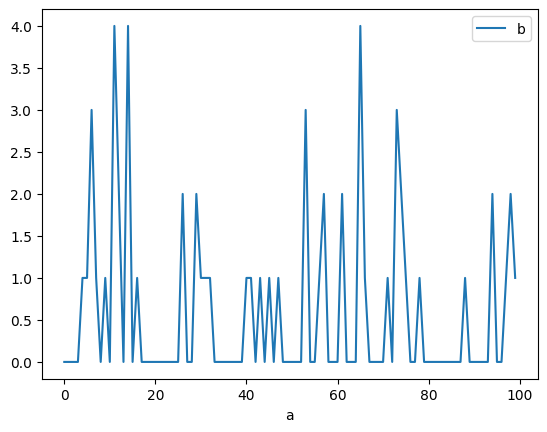

In [39]:
agg = df.groupby("a", as_index=False)
df_1 = agg.min()[["a", "b"]]
df_2 = agg.std()[["a", "c"]]
df_1.merge(df_2, on="a", how="right").plot(x="a", y="b")

In [39]:
df.drop(columns="foo", inplace=True)
df

,a,b,c,d,e,f,g,h,i,j
0,57,53,19,27,59,16,11,7,54,22
1,96,6,74,71,27,47,81,34,99,42
2,6,83,64,21,84,46,11,85,47,76
3,45,80,36,85,20,73,63,74,80,66
4,4,68,68,98,88,30,56,47,50,80
...,...,...,...,...,...,...,...,...,...,...
9995,4,4,30,8,58,27,22,91,52,11
9996,24,21,97,47,57,50,81,40,63,15
9997,11,45,80,91,9,79,69,90,63,22
9998,4,87,83,1,82,76,72,56,15,54


In [ ]:
columns = df.columns

df_min = df.groupby(columns[0], as_index=False).min().rename(columns={col: f"min_{col}" for col in columns[1::]})
df_max = df.groupby(columns[0], as_index=False).max().rename(columns={col: f"max_{col}" for col in columns[1::]})
df_avg = df.groupby(columns[0], as_index=False).mean().rename(columns={col: f"avg_{col}" for col in columns[1::]})

df_min.merge(df_max, how="left", on=columns[0]).merge(df_avg, how="left", on=columns[0])

,a,min_b,min_c,min_d,min_e,min_f,min_g,min_h,min_i,min_j,...,max_j,avg_b,avg_c,avg_d,avg_e,avg_f,avg_g,avg_h,avg_i,avg_j
0,0,1,0,1,0,0,0,0,2,1,...,99,50.074074,51.888889,49.046296,49.324074,47.694444,48.824074,53.435185,51.185185,45.324074
1,1,0,0,0,2,1,0,1,0,1,...,99,49.345238,51.011905,48.226190,55.892857,43.773810,49.619048,41.797619,41.964286,48.130952
2,2,0,1,1,1,1,1,0,0,0,...,99,48.509259,51.027778,51.657407,50.518519,44.287037,48.629630,49.046296,49.990741,51.916667
3,3,1,2,0,0,0,0,0,0,0,...,99,52.097826,56.097826,54.489130,51.369565,48.706522,52.206522,49.130435,51.260870,51.130435
4,4,0,1,1,0,1,0,0,0,2,...,99,52.221239,51.433628,52.654867,52.407080,45.681416,50.584071,47.884956,45.389381,50.699115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0,0,0,0,2,1,1,0,1,...,98,49.917647,45.811765,49.258824,49.317647,52.129412,51.258824,53.011765,50.517647,51.117647
96,96,0,2,0,0,0,0,3,1,1,...,99,52.265957,49.234043,49.148936,46.244681,51.957447,54.074468,51.563830,51.393617,48.648936
97,97,0,0,0,3,0,0,2,0,0,...,99,46.929688,52.726562,44.835938,50.562500,50.164062,46.546875,50.960938,48.914062,48.734375
98,98,1,0,1,0,1,0,0,2,1,...,99,52.238095,50.028571,53.676190,48.971429,47.019048,47.866667,49.676190,52.180952,52.200000


In [40]:
df.to_numpy()

array([[57, 53, 19, ...,  7, 54, 22],
       [96,  6, 74, ..., 34, 99, 42],
       [ 6, 83, 64, ..., 85, 47, 76],
       ...,
       [11, 45, 80, ..., 90, 63, 22],
       [ 4, 87, 83, ..., 56, 15, 54],
       [78, 92, 80, ..., 88, 46, 18]], shape=(10000, 10))